# Imports

In [28]:
import os
from IPython.display import display

import numpy as np

# Dataframes
import pandas as pd

# Graphics
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as mtick
import plotly.express as px
import plotly.graph_objects as go


In [2]:
# Work paths
current_path = os.getcwd()
data_path = current_path + '/data/movielens-100k'

# Reading the data

In [3]:
# Reading the rating info
file_path = data_path + '/u.data'
columns = ['user_id','movie_id','rating','timestamp']  
ratings = pd.read_csv(file_path, sep='\t', names=columns, header=None)

In [4]:
# Reading the movie info
file_path = data_path + '/u.item'
columns = [
    'movie_id','movie_title','release_date','video_release_date','IMDb_url',
    'unknown','Action','Adventure','Animation','Children','Comedy','Crime',
    'Documentary','Drama','Fantasy','Film-Noir','Horror','Musical','Mystery',
    'Romance','Sci-Fi','Thriller','War','Western'
]
# Using latin-1 encoding to correctly read the movie titles 
movies = pd.read_csv(file_path, sep='|', names=columns, encoding='latin-1')  

In [5]:
# Reading the user info
file_path = data_path + '/u.user'
columns = ['user_id','age','gender','occupation','zip_code']
# Using latin-1 encoding to correctly read the user professions
users = pd.read_csv(file_path, sep='|', names=columns, encoding='latin-1')

# Exploring the data

#### Overview of the data

In [6]:
ratings.head()

,user_id,movie_id,rating,timestamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596


In [7]:
movies.head()

,movie_id,movie_title,release_date,video_release_date,IMDb_url,unknown,Action,Adventure,Animation,Children,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
1,2,GoldenEye (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?GoldenEye%20(...,0,1,1,0,0,...,0,0,0,0,0,0,0,1,0,0
2,3,Four Rooms (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Four%20Rooms%...,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,4,Get Shorty (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Get%20Shorty%...,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,Copycat (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Copycat%20(1995),0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [8]:
users.head()

,user_id,age,gender,occupation,zip_code
0,1,24,M,technician,85711
1,2,53,F,other,94043
2,3,23,M,writer,32067
3,4,24,M,technician,43537
4,5,33,F,other,15213


#### Data Description

***Ratings Dataframe***

In [9]:
# Displaying the size of the ratings dataframe
print(f"DataFrame size: {ratings.shape[0]} rows and {ratings.shape[1]} columns")

# Number of unique rated movies
num_rated_movies = ratings['movie_id'].nunique()
print(f"Number of rated movies: {num_rated_movies}")

# Number of unique voting users
num_voting_users = ratings['user_id'].nunique()
print(f"Number of voting users: {num_voting_users}")



DataFrame size: 100000 rows and 4 columns
Number of rated movies: 1682
Number of voting users: 943


In [10]:
ratings.dtypes

user_id      int64
movie_id     int64
rating       int64
timestamp    int64
dtype: object

In [11]:
# Missing data
ratings.isna().sum()

user_id      0
movie_id     0
rating       0
timestamp    0
dtype: int64

***Movies Dataframe***

In [12]:
# Displaying the size of the movies dataframe
print(f"DataFrame size: {movies.shape[0]} rows and {movies.shape[1]} columns")
print(f"Number of unique movie ids in the DataFrame: {movies.movie_id.nunique()}")
print(f"Number of unique movie titles in the DataFrame: {movies.movie_title.nunique()}")
# Number of movies per genre
movies_per_genre = movies.drop(columns=['movie_id', 'movie_title', 'release_date', 'video_release_date', 'IMDb_url']).sum()
print("Number of movies per genre:")
print(movies_per_genre)

DataFrame size: 1682 rows and 24 columns
Number of unique movie ids in the DataFrame: 1682
Number of unique movie titles in the DataFrame: 1664
Number of movies per genre:
unknown          2
Action         251
Adventure      135
Animation       42
Children       122
Comedy         505
Crime          109
Documentary     50
Drama          725
Fantasy         22
Film-Noir       24
Horror          92
Musical         56
Mystery         61
Romance        247
Sci-Fi         101
Thriller       251
War             71
Western         27
dtype: int64


In [13]:
# Find all duplicate rows in the entire dataframe
duplicate_rows = movies[movies.drop(columns=['movie_id']).duplicated(keep=False)]

# Display the duplicate rows
duplicate_rows

,movie_id,movie_title,release_date,video_release_date,IMDb_url,unknown,Action,Adventure,Animation,Children,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
245,246,Chasing Amy (1997),01-Jan-1997,NaN,http://us.imdb.com/M/title-exact?Chasing+Amy+(...,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
265,266,Kull the Conqueror (1997),29-Aug-1997,NaN,http://us.imdb.com/M/title-exact?Kull+the+Conq...,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
267,268,Chasing Amy (1997),01-Jan-1997,NaN,http://us.imdb.com/M/title-exact?Chasing+Amy+(...,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
296,297,Ulee's Gold (1997),01-Jan-1997,NaN,http://us.imdb.com/M/title-exact?Ulee%27s+Gold...,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
302,303,Ulee's Gold (1997),01-Jan-1997,NaN,http://us.imdb.com/M/title-exact?Ulee%27s+Gold...,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
303,304,Fly Away Home (1996),13-Sep-1996,NaN,http://us.imdb.com/M/title-exact?Fly%20Away%20...,0,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
304,305,"Ice Storm, The (1997)",01-Jan-1997,NaN,http://us.imdb.com/M/title-exact?Ice+Storm%2C+...,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
308,309,Deceiver (1997),01-Jan-1997,NaN,http://us.imdb.com/M/title-exact?Liar+(1997),0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
328,329,Desperate Measures (1998),30-Jan-1998,NaN,http://us.imdb.com/Title?Desperate+Measures+(1...,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
347,348,Desperate Measures (1998),30-Jan-1998,NaN,http://us.imdb.com/Title?Desperate+Measures+(1...,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


We're not going to delete the duplicate rows since we will need them to merge with the ratings, but we will definitely delete the movie IDs once the data is merged

In [14]:
movies.dtypes

movie_id                int64
movie_title            object
release_date           object
video_release_date    float64
IMDb_url               object
unknown                 int64
Action                  int64
Adventure               int64
Animation               int64
Children                int64
Comedy                  int64
Crime                   int64
Documentary             int64
Drama                   int64
Fantasy                 int64
Film-Noir               int64
Horror                  int64
Musical                 int64
Mystery                 int64
Romance                 int64
Sci-Fi                  int64
Thriller                int64
War                     int64
Western                 int64
dtype: object

In [15]:
# Missing data
movies.isna().sum()

movie_id                 0
movie_title              0
release_date             1
video_release_date    1682
IMDb_url                 3
unknown                  0
Action                   0
Adventure                0
Animation                0
Children                 0
Comedy                   0
Crime                    0
Documentary              0
Drama                    0
Fantasy                  0
Film-Noir                0
Horror                   0
Musical                  0
Mystery                  0
Romance                  0
Sci-Fi                   0
Thriller                 0
War                      0
Western                  0
dtype: int64

In [16]:
# Deleting the column video_release_date because it is always null
# Deleting the IMDB URL because it's no use to us at this point

movies.drop(columns=['video_release_date','IMDb_url'],inplace=True)

In [17]:
# Let's look at the movie with a null release_date
movie_with_null_release_date = movies[movies.release_date.isnull()]

# Who rated this movie
movie_ratings = ratings[ratings.movie_id == movie_with_null_release_date['movie_id'].unique()[0]]

# Display both dataframes
display(movie_with_null_release_date)
display(movie_ratings)

# Since the movie is unknown, we're going to delete it from our movie dataframe even though it has ratings
# (The movie title, genre and release date will be important features for us to define similarity and recommend products)

movies.dropna(subset=['release_date'],inplace=True)


,movie_id,movie_title,release_date,unknown,Action,Adventure,Animation,Children,Comedy,Crime,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
266,267,unknown,NaN,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


,user_id,movie_id,rating,timestamp
2172,130,267,5,875801239
3781,5,267,4,875635064
7245,268,267,3,875742077
12475,297,267,3,875409139
14756,319,267,4,875707690
15292,1,267,4,875692955
49295,532,267,3,875441348
93523,833,267,1,875655669
99723,422,267,4,875655986


In [18]:
# Let's look at the movies with an unknown genre
unknown_genre_movie = movies[movies.unknown==1]
display(unknown_genre_movie)

# After looking up the movie (here's the link I checked https://www.imdb.com/title/tt0067152/)
# I figured the movie is sort of a dramatic comedy
# Let's fill in its genre
movie_id = unknown_genre_movie['movie_id'].unique()[0]  # Get the movie_id
movies.loc[movies.movie_id == movie_id, ['Comedy', 'Drama']] = 1

# Let's now delete the unknown column because it has become useless to us 
# (Technically we could keep it to identify the movies that had a missing genre, but since we only have one, we're deleting it anyway)
movies.drop(columns=['unknown'],inplace=True)

,movie_id,movie_title,release_date,unknown,Action,Adventure,Animation,Children,Comedy,Crime,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
1372,1373,Good Morning (1971),4-Feb-1971,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [40]:
# Convert the 'release_date' column to datetime
movies['release_date'] = pd.to_datetime(movies['release_date'], errors='coerce')

# Drop movies without a release date
movies_clean = movies[movies['release_date'].notnull()]

# Assign a unique Y-value to each movie to prevent overlapping
movies_clean['y_position'] = np.arange(len(movies_clean))

# Create the plotly scatter plot
fig = go.Figure()

# Add the scatter plot with movie data
fig.add_trace(go.Scatter(
    x=movies_clean['release_date'],
    y=movies_clean['y_position'],
    mode='markers',
    marker=dict(
        size=10,
        color='purple',        # Use a consistent purple theme
        opacity=0.7,
        line=dict(width=1.5, color='black')
    ),
    text=movies_clean['movie_title'],  # Text for hover
    name='Movies'
))

# Customize layout for better aesthetics
fig.update_layout(
    title=dict(
        text="Movie Release Timeline",
        font=dict(size=20, color='purple'),  # Title color matches the theme
        x=0.5, y=0.95  # Centered title position
    ),
    xaxis=dict(
        title='Release Date',
        titlefont=dict(size=16, color='purple'),  # Axis title in theme color
        tickfont=dict(size=12, color='purple')    # Tick labels in theme color
    ),
    yaxis=dict(
        showticklabels=False,  # Hide y-axis tick labels
        tickvals=[],           # Remove y-axis tick values
        showgrid=False,        # Optionally remove gridlines
        zeroline=False         # Remove the zero line if present
    ),
    showlegend=False,
    height=600,  # Set height for better view
    margin=dict(l=10, r=10, t=50, b=100),  # Adjust margins
    plot_bgcolor="white"  # Clean white background
)

# Display the plot
fig.show()


***Users Dataframe***

In [ ]:
# Displaying the size of the ratings dataframe
print(f"DataFrame size: {users.shape[0]} rows and {users.shape[1]} columns")
print(f"Number of unique user IDs in the DataFrame: {users.user_id.nunique()}")

# Displaying the number of users per gender
print(f"Number of users per {users['gender'].value_counts()}")

DataFrame size: 943 rows and 5 columns
Number of unique user IDs in the DataFrame: 943
Number of users per gender
M    670
F    273
Name: count, dtype: int64
Number of users per occupation
student          196
other            105
educator          95
administrator     79
engineer          67
programmer        66
librarian         51
writer            45
executive         32
scientist         31
artist            28
technician        27
marketing         26
entertainment     18
healthcare        16
retired           14
lawyer            12
salesman          12
none               9
homemaker          7
doctor             7
Name: count, dtype: int64


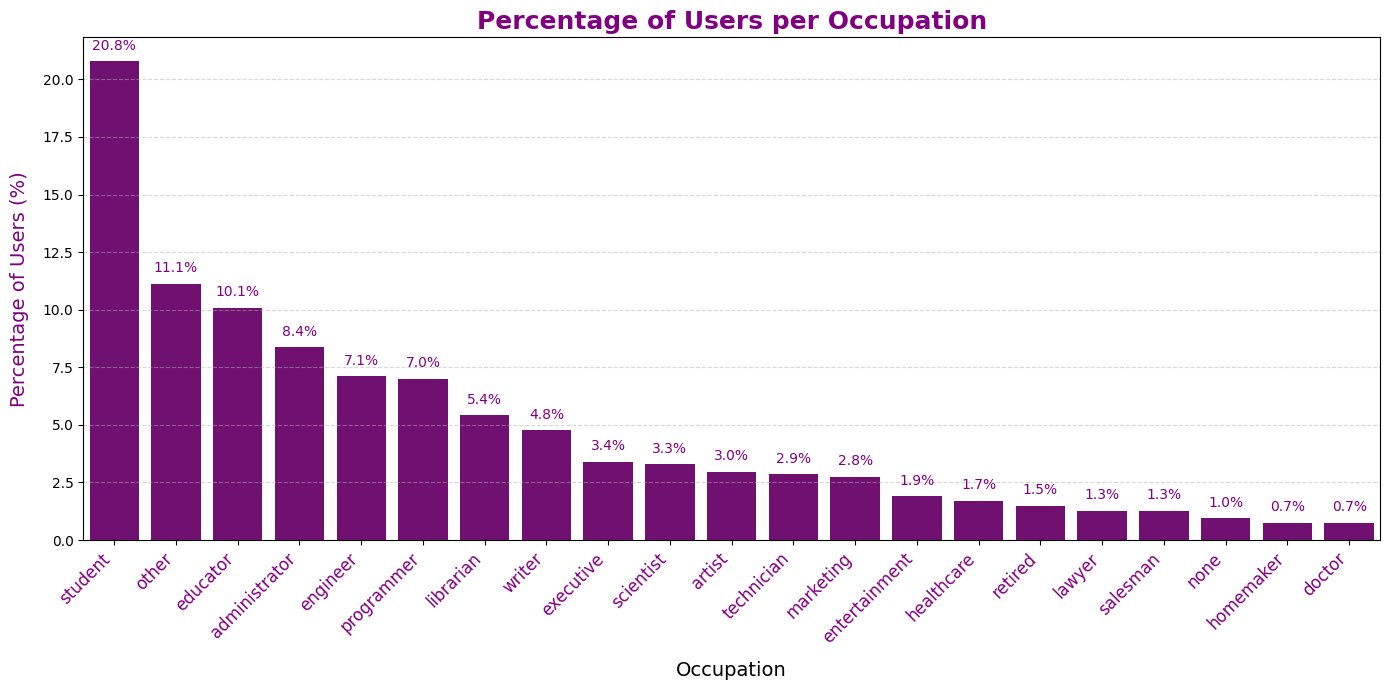

In [39]:
# Calculate percentage of users per occupation
users_per_occupation = users['occupation'].value_counts()
users_percentage = (users_per_occupation / users_per_occupation.sum()) * 100

# Create the figure and bar plot
plt.figure(figsize=(14, 7))
sns.barplot(
    x=users_percentage.index,
    y=users_percentage.values,
    color='purple'  # Use a single consistent color
)

# Add titles and labels
plt.title('Percentage of Users per Occupation', fontsize=18, fontweight='bold', color='purple')
plt.xlabel('Occupation', fontsize=14, labelpad=10)
plt.ylabel('Percentage of Users (%)', fontsize=14, labelpad=10, color='purple')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right', fontsize=12, color='purple')

# Add data labels to each bar
for index, value in enumerate(users_percentage.values):
    plt.text(index, value + 0.5, f"{value:.1f}%", ha='center', fontsize=10, color='purple')

# Add a subtle grid to the y-axis
plt.grid(axis='y', linestyle='--', alpha=0.5)

# Improve layout
plt.tight_layout()

# Show the plot
plt.show()

In [21]:
# Missing data
users.isna().sum()

user_id       0
age           0
gender        0
occupation    0
zip_code      0
dtype: int64

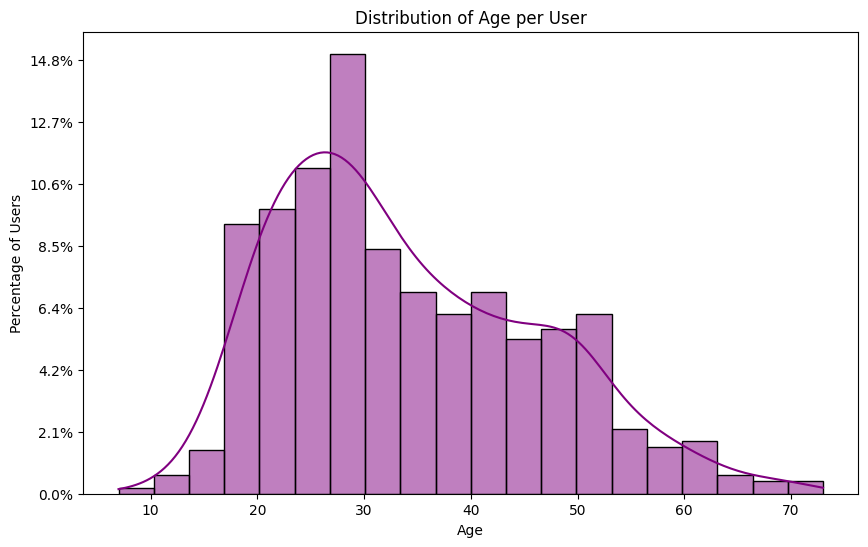

In [37]:
# Visualize the distribution of age per user with a custom color and percentage of the total number of users
plt.figure(figsize=(10, 6))

# Plot with color customization and percentage (normalized to the total number of users)
sns.histplot(users['age'], bins=20, kde=True, color='purple', stat='count', discrete=False)

# Set the y-axis to show percentages
total_users = len(users)
plt.gca().set_ylabel('Percentage of Users')

# Customize the plot title and x-axis label
plt.title('Distribution of Age per User')
plt.xlabel('Age')

# Convert y-axis labels to percentage format
plt.gca().yaxis.set_major_formatter(mtick.FuncFormatter(lambda y, _: f'{(y / total_users) * 100:.1f}%'))

# Show the plot
plt.show()